# Importar Modulos

In [92]:
import pandas as pd
import numpy as np
import seaborn as sn
import plotly.express as px
import tensorflow as tf

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display

# Importación de Datos

In [93]:
data = np.loadtxt("lp5.csv", delimiter=",", dtype=str)
data_copy = data #va de 0 a 2623 o sea 2624 datos
cont = 16
labels = []
numbers = []
features= np.zeros((164,15,6))

for i in range(len(data_copy)):
    if(cont == 16):
        labels.append(data_copy[i])
    if(cont<16):
        numbers.append(data_copy[i])
    cont -= 1
    if(cont == 0):
        cont = 16
        
cont = 0
for i in range(164):
    for j in range(15):
        for z in range(6):
            features[i][j][z] = numbers[cont][z]
        cont += 1
        
labels_df = pd.DataFrame(labels, columns=['labels','1','2','3','4','5'])
#labels_df = labels_df.loc[:,['labels']]
display(labels_df)
display(features)

,labels,1,2,3,4,5
0,normal,,,,,
1,normal,,,,,
2,normal,,,,,
3,normal,,,,,
4,normal,,,,,
...,...,...,...,...,...,...
159,collision_in_tool,,,,,
160,collision_in_tool,,,,,
161,collision_in_tool,,,,,
162,collision_in_tool,,,,,


array([[[ -2.,  -1.,  81.,   0.,  -5.,   0.],
        [ -2.,  -1.,  79.,   0.,  -4.,   0.],
        [ -2.,  -1.,  79.,   0.,  -4.,   0.],
        ...,
        [ -2.,  -1.,  78.,   0.,  -5.,   0.],
        [ -3.,  -1.,  80.,   1.,  -4.,   1.],
        [ -2.,  -1.,  79.,   0.,  -4.,   0.]],

       [[  6.,  -1.,  79.,  -2.,   4.,  -3.],
        [ 42.,  -3.,  80.,   5.,  53.,   3.],
        [ -5.,   4.,  74., -15., -10.,  -1.],
        ...,
        [ -1.,  -5.,  80.,   6.,  -6.,   0.],
        [ -4.,   5.,  78., -14.,  -9.,  -4.],
        [ -4.,   1.,  80.,  -3., -12.,   5.]],

       [[ -2.,  -6.,  85.,  14.,  -5.,   2.],
        [  0.,   2.,  74.,  -7.,   1.,   0.],
        [ -4.,  -5.,  76.,   7., -11.,   4.],
        ...,
        [  0.,  -9.,  87.,  13.,  -5.,   2.],
        [ -5.,   5.,  67., -17., -16.,   7.],
        [ -6., -10.,  86.,  16., -14.,  -1.]],

       ...,

       [[-12.,  17.,   3., -19., -10.,  -4.],
        [-12.,  12.,  11., -13., -16.,  -4.],
        [ -8.,   3.,  

# Manejo de Datos y Normalización

In [94]:
classes_dict = {'normal':'1 0 0 0 0', #1
        'collision_in_tool':'0 1 0 0 0', #2
        'collision_in_part':'0 0 1 0 0', #3
        'bottom_collision':'0 0 0 1 0', #4
        'bottom_obstruction':'0 0 0 0 1'} #5

labels_df = labels_df.replace({'labels':classes_dict})
labels_df[['1', '2', '3', '4', '5']] = labels_df['labels'].str.split(' ', 4, expand= True)
labels_df = labels_df.loc[:,['1', '2', '3', '4', '5']]
labels_df[['1', '2', '3', '4', '5']]=labels_df[['1', '2', '3', '4', '5']].astype(str).astype(int)
display(labels_df)

def norm(x):
    x_min = x.min()
    x_max = x.max()
    range = x_max - x_min  #min max entre 0 y 1
    return((x-x_min)/(range))

norm_features = norm(features)
#split para entrenamiento y validacion
train_features, test_features, train_labels, test_labels  = train_test_split(norm_features, labels_df, test_size=0.2, random_state= 42)
display(train_features)
display(train_labels)

C:\Users\dave4\AppData\Local\Temp\ipykernel_19644\1709456343.py:8: FutureWarning:

In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.



,1,2,3,4,5
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
159,0,1,0,0,0
160,0,1,0,0,0
161,0,1,0,0,0
162,0,1,0,0,0


array([[[0.77660263, 0.78156702, 0.79084826, 0.77055903, 0.7684006 ,
         0.77422836],
        [0.77466005, 0.78739478, 0.78717893, 0.75156486, 0.7638679 ,
         0.77206993],
        [0.77401252, 0.78804231, 0.79041658, 0.74465789, 0.76106195,
         0.77012735],
        ...,
        [0.78005612, 0.7804878 , 0.78437298, 0.78135118, 0.78113533,
         0.78027196],
        [0.78027196, 0.78091949, 0.77962443, 0.78091949, 0.78027196,
         0.78027196],
        [0.78027196, 0.78070365, 0.78286208, 0.78156702, 0.78091949,
         0.78005612]],

       [[0.78027196, 0.77940859, 0.79905029, 0.78372545, 0.77962443,
         0.78113533],
        [0.78070365, 0.78113533, 0.79667602, 0.77919275, 0.78091949,
         0.78070365],
        [0.77984028, 0.77962443, 0.79710771, 0.78221455, 0.77832938,
         0.78156702],
        ...,
        [0.78070365, 0.77876106, 0.79948198, 0.78350961, 0.77962443,
         0.78113533],
        [0.77962443, 0.78178286, 0.79516512, 0.77703432, 0.777

,1,2,3,4,5
84,0,0,1,0,0
2,1,0,0,0,0
94,0,1,0,0,0
45,0,0,1,0,0
42,0,0,1,0,0
...,...,...,...,...,...
71,0,0,1,0,0
106,0,0,0,1,0
14,1,0,0,0,0
92,0,1,0,0,0


# Creación del Modelo

In [95]:
def my_model(learning_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (15,6,1)), # #de feature maps, dimensiones del kernel, kernel entre más pequeño mejor y se prefiere un número impar
        tf.keras.layers.MaxPooling2D((3,3)), # dimensiones del pooling
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy','mean_squared_error'])
    
    return model
# input shape es 15 filas, 6 columnas y 1 canal de color
model = my_model(0.01)
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 13, 4, 16)         160       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 4, 1, 16)         0         
 g2D)                                                            
                                                                 
 flatten_26 (Flatten)        (None, 64)                0         
                                                                 
 dense_52 (Dense)            (None, 64)                4160      
                                                                 
 dense_53 (Dense)            (None, 5)                 325       
                                                                 
Total params: 4,645
Trainable params: 4,645
Non-trainable params: 0
___________________________________________________

# Entrenamiento del Modelo

In [96]:
def train_model(model, features, labels, epochs, batch_size):
    history = model.fit(
        x = features,
        y = labels,
        epochs= epochs,
        batch_size= batch_size,
        validation_split= 0.25
    )
    hist= pd.DataFrame(history.history) #se guardan los valores de errores y metricas en un diccionario
    hist['epoch'] = history.epoch #los epochs se deben añadir aparte
    mse = hist['mean_squared_error']
    return hist, mse

# Visualizaciones
### Pasos para visualizar los filtros:
##### 1. Iterar por todas las capas del modelo usando model.layers
##### 2. Si la capa actual es de convolucion se extraen los pesos y sesgos usando get_weights()
##### 3. Se normalizan los pesos de los filtros entre 0 y 1
##### 4. Se plotean los filtros para cada capa convolutional y todos los canales de color

In [97]:
## Visualización de los filtros

def view_filters(model):
    for layer in model.layers:
        if 'conv' in layer.name:
            filters, bias= layer.get_weights()
            print(layer.name, filters.shape)
        #normalize filter values between  0 and 1 for visualization
            f_min, f_max = filters.min(), filters.max()
            filters = (filters - f_min) / (f_max - f_min)  
            print(filters.shape[3])
            axis_x=1
        #plotting all the filters
            for i in range(filters.shape[3]):
        #for i in range(6):
            #get the filters
                filt=filters[:,:,:, i]
                plotFilters(filt)
                
def plotFilters(conv_filter):
    fig, axes = plt.subplots(1, 3, figsize=(5,5))
    axes = axes.flatten()
    for img, ax in zip( conv_filter, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.savefig('filters.jpg')
    plt.show()
## Visualización de las curvas de pérdida

def loss_curves(history):
    hist = history
    labels = {"mean_squared_error":"Training Loss", "val_mean_squared_error":"Validation Loss"}
    hist.rename(columns = labels, inplace = True)
    
    fig = px.line(hist, x='epoch', y=['Training Loss', 'Validation Loss'],
                title='Gráficas de Pérdida de Entrenamiento y Evaluación',
                labels={"epoch": "Epoch", "value":"Mean Square Error", "variable":"Curvas de Pérdida"},
                color_discrete_map={ # replaces default color mapping by value
                "Training Loss": "#46039f", "Validation Loss": "#fb9f3a"})
    fig.update_layout(template='plotly_white')
    fig.show()

# Se corren las funciones

Epoch 1/100


C:\Users\dave4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\backend.py:5676: UserWarning:

"`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?



20/20 [==============================] - 1s 9ms/step - loss: 0.6171 - accuracy: 0.1224 - mean_squared_error: 0.1603 - val_loss: 0.5684 - val_accuracy: 0.2727 - val_mean_squared_error: 0.1604
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5274 - accuracy: 0.3367 - mean_squared_error: 0.1584 - val_loss: 0.5003 - val_accuracy: 0.2727 - val_mean_squared_error: 0.1585
Epoch 3/100
 1/20 [>.............................] - ETA: 0s - loss: 0.4960 - accuracy: 0.2000 - mean_squared_error: 0.1571

C:\Users\dave4\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\backend.py:5676: UserWarning:

"`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?



20/20 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.3163 - mean_squared_error: 0.1561 - val_loss: 0.4917 - val_accuracy: 0.2727 - val_mean_squared_error: 0.1576
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4870 - accuracy: 0.3163 - mean_squared_error: 0.1559 - val_loss: 0.4895 - val_accuracy: 0.2727 - val_mean_squared_error: 0.1575
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.3163 - mean_squared_error: 0.1552 - val_loss: 0.4917 - val_accuracy: 0.2727 - val_mean_squared_error: 0.1582
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.3163 - mean_squared_error: 0.1549 - val_loss: 0.4886 - val_accuracy: 0.2727 - val_mean_squared_error: 0.1574
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.3163 - mean_squared_error: 0.1545 - val_loss: 0.4918 - val_accuracy: 0.2727 - val_mean_squared_error: 0.15

conv2d_27 (3, 3, 1, 16)
16


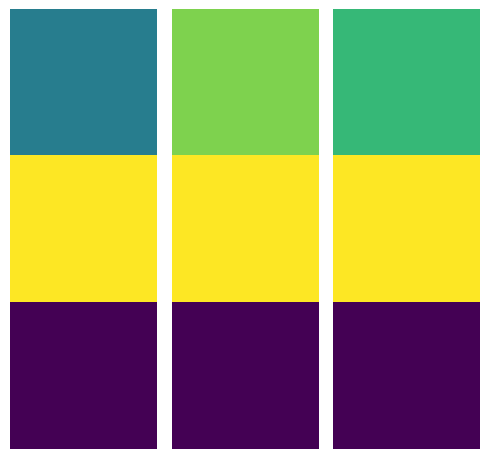

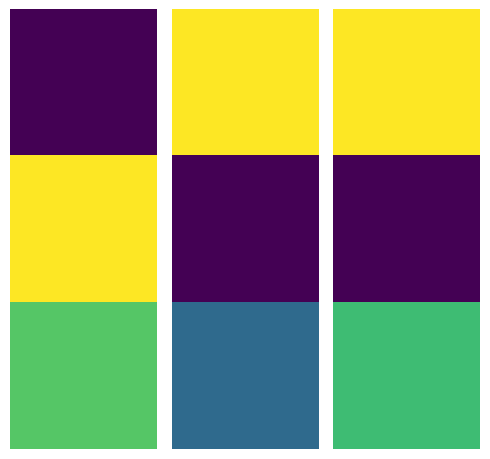

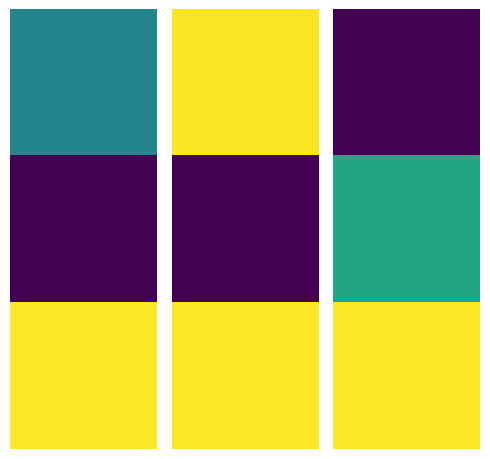

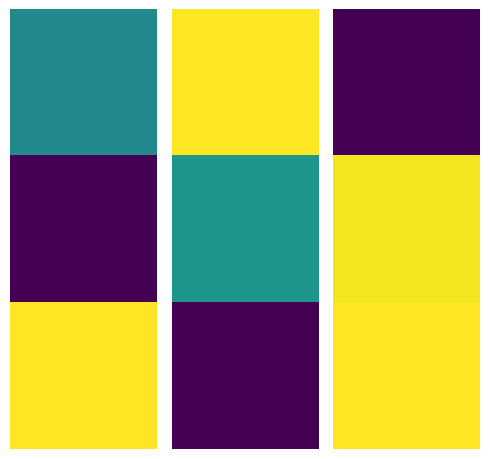

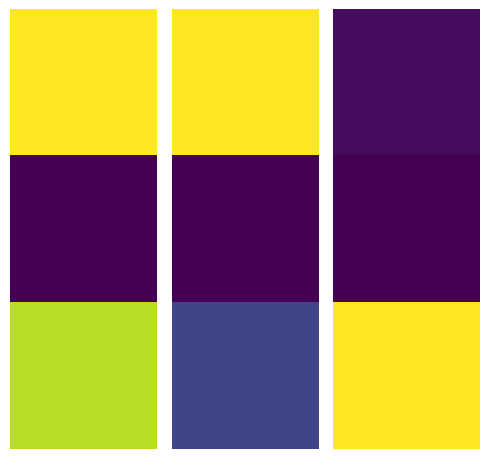

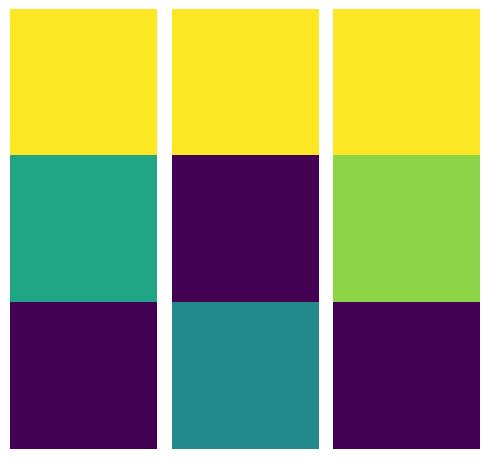

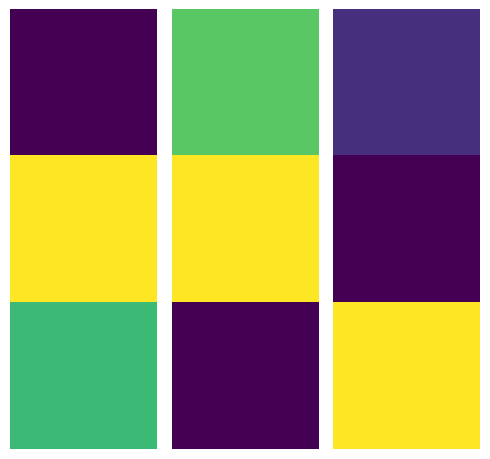

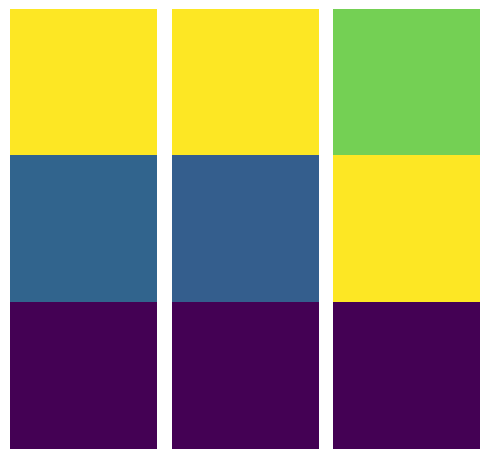

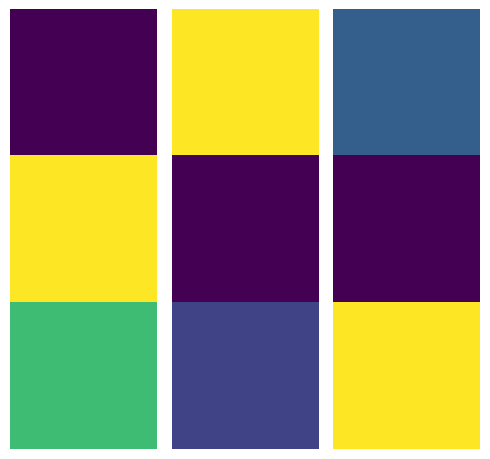

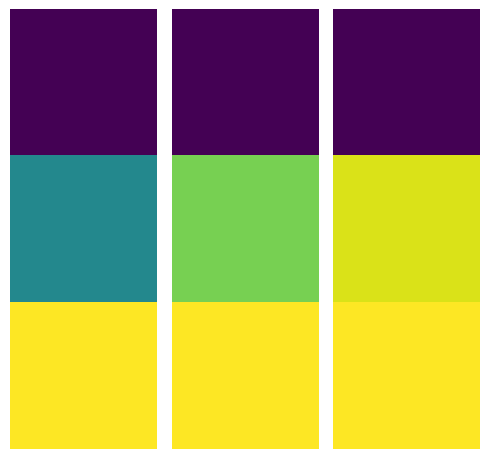

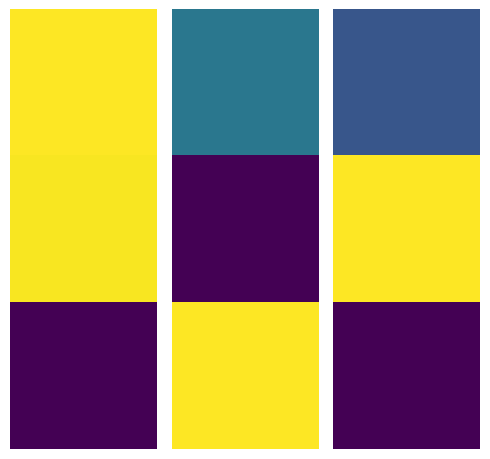

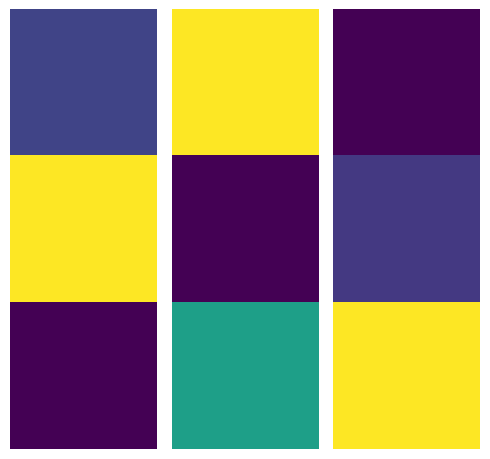

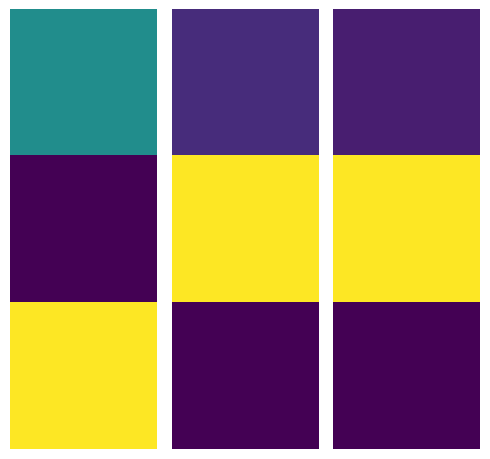

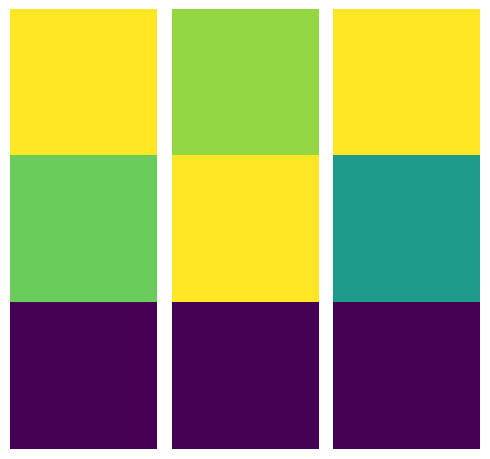

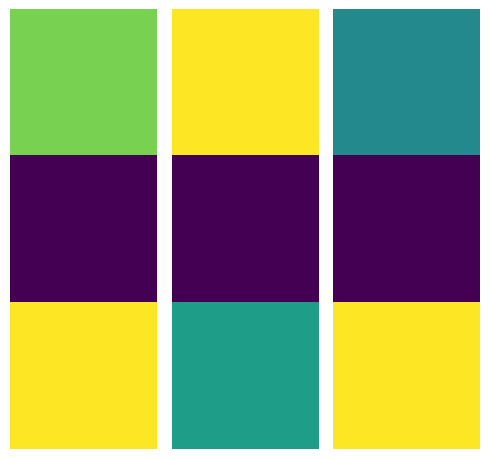

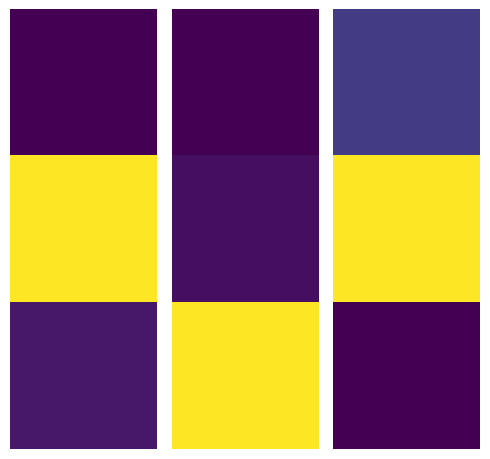

,loss,accuracy,Training Loss,val_loss,val_accuracy,Validation Loss,epoch
0,0.617102,0.122449,0.160287,0.568380,0.272727,0.160439,0
1,0.527447,0.336735,0.158433,0.500349,0.272727,0.158458,1
2,0.490672,0.316327,0.156137,0.491699,0.272727,0.157557,2
3,0.486997,0.316327,0.155908,0.489517,0.272727,0.157483,3
4,0.485073,0.316327,0.155188,0.491652,0.272727,0.158216,4
...,...,...,...,...,...,...,...
95,0.393189,0.448980,0.126835,0.429356,0.333333,0.146875,95
96,0.392639,0.448980,0.126916,0.426563,0.333333,0.144107,96
97,0.392930,0.448980,0.127230,0.432607,0.333333,0.149342,97
98,0.391247,0.448980,0.127665,0.430595,0.333333,0.149131,98


In [98]:
learning_rate = 0.03
epochs = 100
batch_size = 5
model = my_model(learning_rate)
history, mse= train_model(model, train_features, train_labels, epochs, batch_size)
loss_curves(history)
view_filters(model)
display(history)